In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('https://query.data.world/s/rxrinidylmazqffztdb2esgvpxaqgh',delimiter='\t')  #import data

In [4]:
data.to_csv('https://query.data.world/s/rxrinidylmazqffztdb2esgvpxaqgh')  #change format file txt to csv

In [6]:
data

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,记录数,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,-35,2012-10-01 00:00:00.000,503,71,Major Market,Central,46,1,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,2012-10-01 00:00:00.000,405,71,Major Market,Central,17,1,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,2012-10-01 00:00:00.000,419,64,Major Market,South,13,1,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,2012-10-01 00:00:00.000,871,56,Major Market,East,10,1,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,2012-10-01 00:00:00.000,650,110,Major Market,West,23,1,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,2013-12-01 00:00:00.000,1820,251,Small Market,West,70,1,...,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,2013-12-01 00:00:00.000,817,133,Small Market,West,29,1,...,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,2013-12-01 00:00:00.000,8252,-294,Small Market,West,111,1,...,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,2013-12-01 00:00:00.000,690,186,Small Market,West,41,1,...,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


In [7]:
data.dtypes 

Area Code                                       int64
Cogs                                            int64
Difference Between Actual and Target Profit     int64
Date                                           object
Inventory                                       int64
Margin                                          int64
Market Size                                    object
Market                                         object
Marketing                                       int64
记录数                                             int64
Product Line                                   object
Product Type                                   object
Product                                        object
Profit                                          int64
Sales                                           int64
State                                          object
Target COGS                                     int64
Target Margin                                   int64
Target Profit               

In [8]:
data.info

<bound method DataFrame.info of       Area Code  Cogs  Difference Between Actual and Target Profit  \
0           303    51                                          -35   
1           970    52                                          -24   
2           409    43                                          -22   
3           850    38                                          -15   
4           562    72                                            6   
...         ...   ...                                          ...   
1057        775   250                                          133   
1058        971    88                                           48   
1059        775   294                                         -285   
1060        503   134                                           80   
1061        435    20                                          -22   

                         Date  Inventory  Margin   Market Size   Market  \
0     2012-10-01 00:00:00.000        503      71  Ma

In [9]:
data['Product Line'].value_counts()

Beans     558
Leaves    504
Name: Product Line, dtype: int64

In [10]:
data['State'].value_counts()

California       72
Utah             72
Colorado         66
Nevada           66
Oregon           66
Washington       60
Missouri         54
Florida          54
Iowa             54
Ohio             54
Illinois         54
Wisconsin        54
New York         48
Texas            42
New Hampshire    42
Oklahoma         42
New Mexico       42
Connecticut      42
Louisiana        42
Massachusetts    36
Name: State, dtype: int64

In [12]:
data['Date'] = pd.to_datetime(data['Date'])  #change Date
data.Date.dtype

dtype('<M8[ns]')

In [11]:
data.groupby('State')['Sales'].sum()

State
California       23032
Colorado         12112
Connecticut       6670
Florida           8825
Illinois         16812
Iowa             13359
Louisiana         6193
Massachusetts     7339
Missouri          6072
Nevada           14822
New Hampshire     3543
New Mexico        3805
New York         17731
Ohio              8787
Oklahoma          7298
Oregon           10661
Texas             9092
Utah              9159
Washington        9744
Wisconsin         7839
Name: Sales, dtype: int64

[Text(0.5, 1.0, 'Total Sales per State ')]

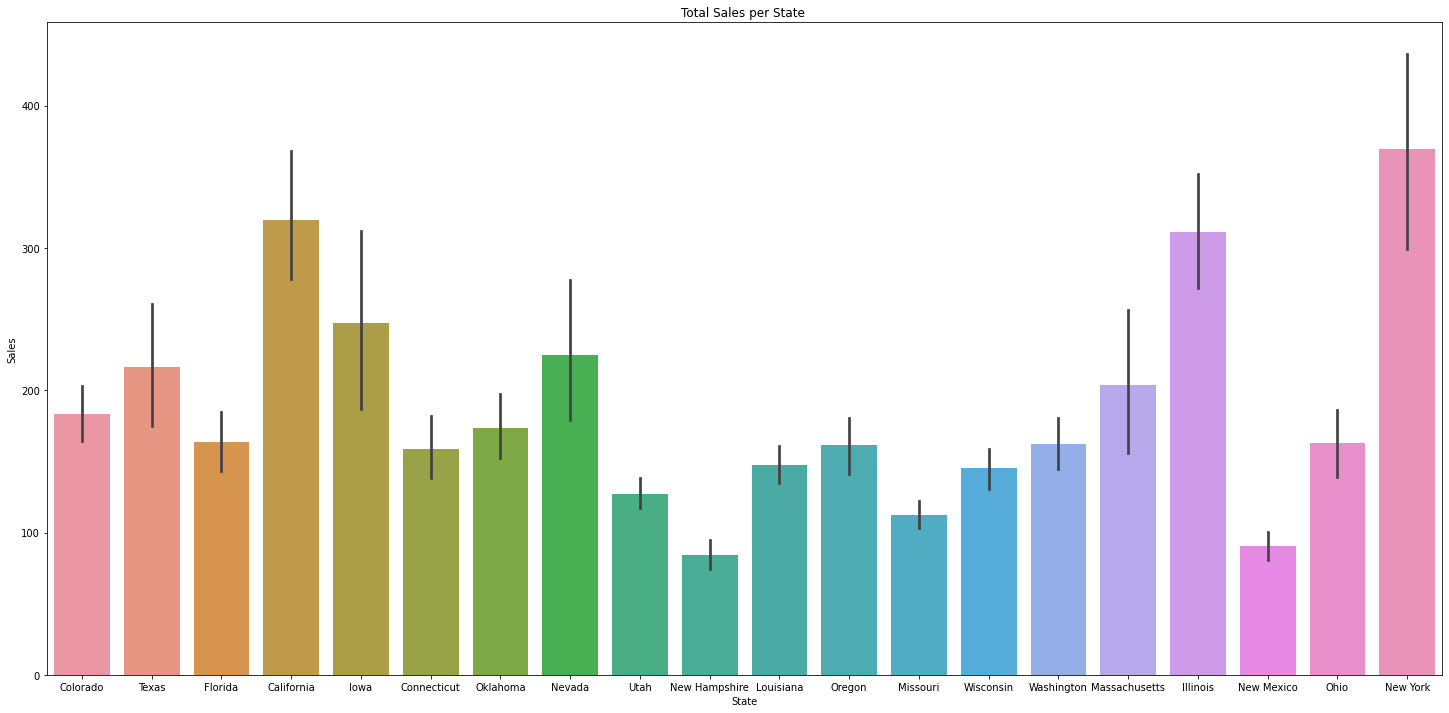

In [13]:
plt.figure(figsize=(25,12))
sns.barplot(x='State',y='Sales',data=data).set(title='Total Sales per State ')

[Text(0.5, 1.0, 'State Performance by Product Line')]

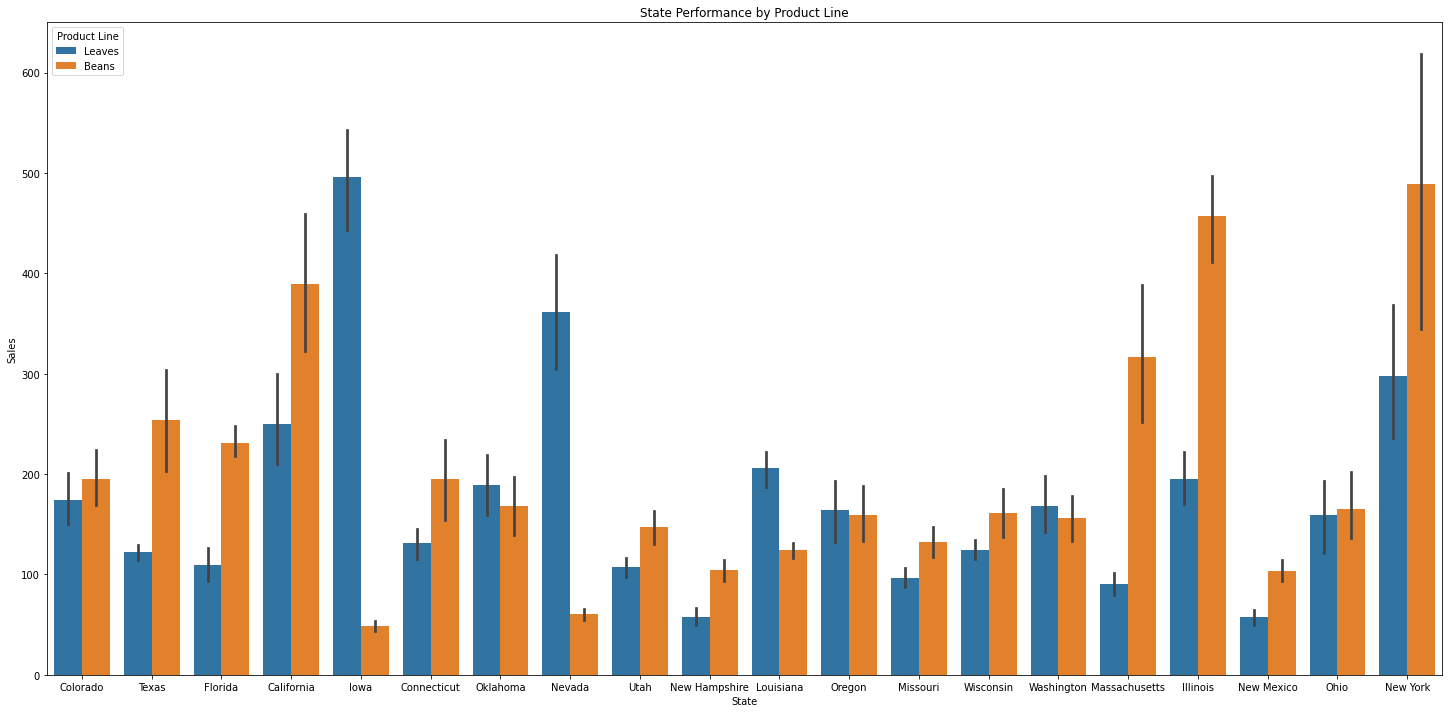

In [14]:
plt.figure(figsize=(25,12))
sns.barplot(x='State', y='Sales', hue='Product Line', data=data).set(title='State Performance by Product Line')

In [15]:
data.groupby('Product Line')['Sales'].mean()

Product Line
Beans     194.240143
Leaves    187.517857
Name: Sales, dtype: float64

[Text(0.5, 1.0, 'State Performance by Product Type')]

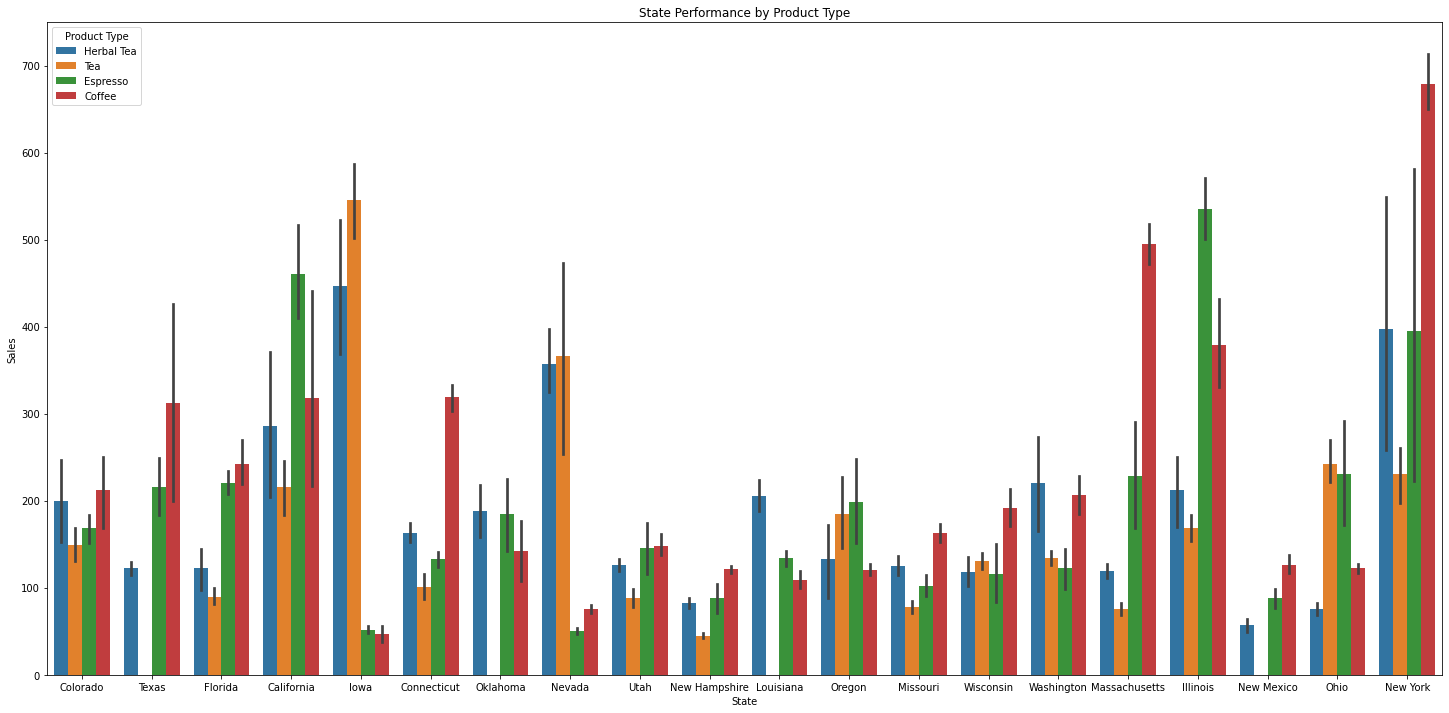

In [16]:
plt.figure(figsize=(25,12))
sns.barplot(x='State', y='Sales', hue='Product Type', data=data).set(title='State Performance by Product Type')

In [17]:
data.groupby('Product Type')['Sales'].mean()

Product Type
Coffee        198.382576
Espresso      190.520408
Herbal Tea    195.776515
Tea           178.433333
Name: Sales, dtype: float64

[Text(0.5, 1.0, 'State Performance by Product')]

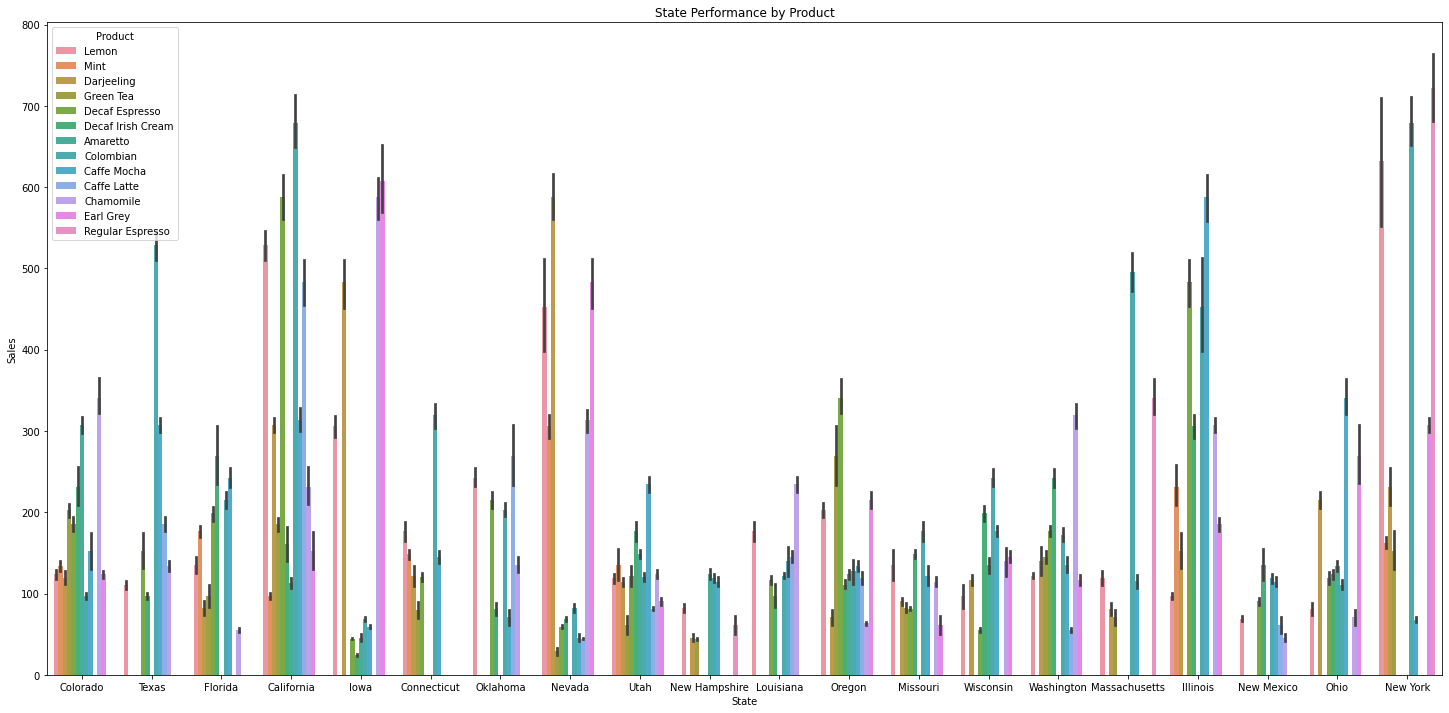

In [18]:
plt.figure(figsize=(25,12))
sns.barplot(x='State', y='Sales', hue='Product', data=data).set(title='State Performance by Product')

In [19]:
data.groupby('Product')['Sales'].mean()

Product
Amaretto             141.270833
Caffe Latte          160.462963
Caffe Mocha          180.966667
Chamomile            200.989583
Colombian            256.341667
Darjeeling           184.979167
Decaf Espresso       185.176471
Decaf Irish Cream    154.489583
Earl Grey            229.805556
Green Tea            118.333333
Lemon                200.400000
Mint                 173.791667
Regular Espresso     374.666667
Name: Sales, dtype: float64

[Text(0.5, 1.0, 'Total Sales Product per Market Size')]

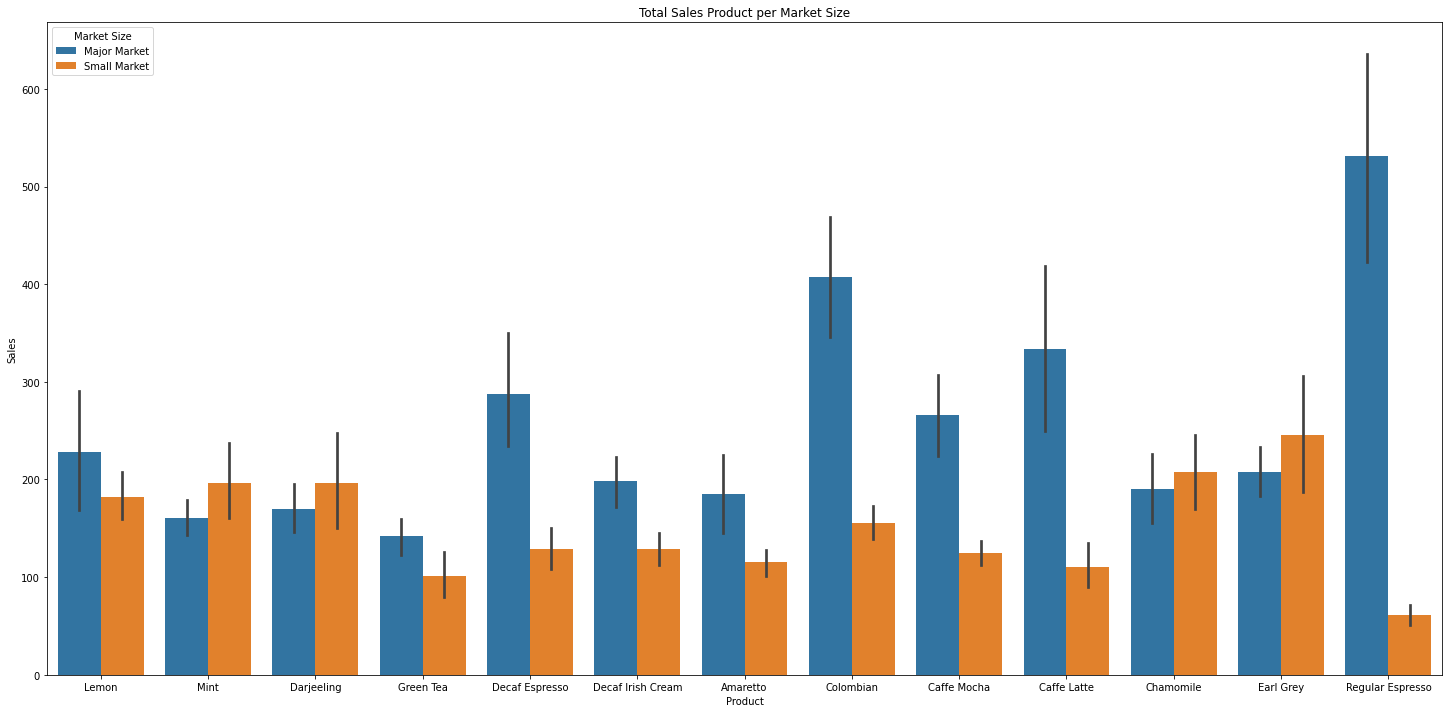

In [20]:
plt.figure(figsize=(25,12))
sns.barplot(x='Product', y='Sales', hue='Market Size', data=data).set(title='Total Sales Product per Market Size')